<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# DX Analytics

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
import sys
sys.path.append('../dx')

## DX Frame

### Risk-Neutral Discounting

In [4]:
dates = [dt.datetime(2020, 1, 1), dt.datetime(2020, 7, 1),
         dt.datetime(2021, 1, 1)]

In [5]:
(dates[1] - dates[0]).days / 365.

0.4986301369863014

In [6]:
(dates[2] - dates[1]).days / 365.

0.5041095890410959

In [7]:
fractions = [0.0, 0.5, 1.0]

In [8]:
from get_year_deltas import get_year_deltas

In [9]:
get_year_deltas(dates)

array([0.        , 0.49863014, 1.00273973])

In [10]:
from constant_short_rate import constant_short_rate

In [11]:
csr = constant_short_rate('csr', 0.05)

In [12]:
csr.get_discount_factors(dates)

array([[datetime.datetime(2020, 1, 1, 0, 0), 1.0],
       [datetime.datetime(2020, 7, 1, 0, 0), 0.9753767163648953],
       [datetime.datetime(2021, 1, 1, 0, 0), 0.9510991280247174]],
      dtype=object)

In [13]:
deltas = get_year_deltas(dates)
deltas

array([0.        , 0.49863014, 1.00273973])

In [14]:
csr.get_discount_factors(deltas, dtobjects=False)

array([[0.        , 1.        ],
       [0.49863014, 0.97537672],
       [1.00273973, 0.95109913]])

### Market Environment

In [15]:
from market_environment import market_environment

In [16]:
me = market_environment('me_gbm', dt.datetime(2020, 1, 1))

In [17]:
me.add_constant('initial_value', 36.)

In [18]:
me.add_constant('volatility', 0.2)

In [19]:
me.add_constant('final_date', dt.datetime(2020, 12, 31))

In [20]:
me.add_constant('currency', 'EUR')

In [21]:
me.add_constant('frequency', 'M')

In [22]:
me.add_constant('paths', 10000)

In [23]:
me.add_curve('discount_curve', csr)

In [24]:
me.get_constant('volatility')

0.2

In [25]:
me.get_curve('discount_curve').short_rate

0.05

## DX Simulation

In [26]:
from sn_random_numbers import *

In [27]:
snrn = sn_random_numbers((2, 2, 2), antithetic=False,
                         moment_matching=False, fixed_seed=True)
snrn

array([[[-0.8044583 ,  0.32093155],
        [-0.02548288,  0.64432383]],

       [[-0.30079667,  0.38947455],
        [-0.1074373 , -0.47998308]]])

In [28]:
round(snrn.mean(), 6)

-0.045429

In [29]:
round(snrn.std(), 6)

0.451876

In [30]:
snrn = sn_random_numbers((2, 2, 2), antithetic=False,
                         moment_matching=True, fixed_seed=True)
snrn

array([[[-1.67972865,  0.81075283],
        [ 0.04413963,  1.52641815]],

       [[-0.56512826,  0.96243813],
        [-0.13722505, -0.96166678]]])

In [31]:
round(snrn.mean(), 6)

-0.0

In [32]:
round(snrn.std(), 6)

1.0

### Geometric Brownian Motion

In [33]:
from dx_frame import *

In [34]:
me_gbm = market_environment('me_gbm', dt.datetime(2020, 1, 1))

In [35]:
me_gbm.add_constant('initial_value', 36.)
me_gbm.add_constant('volatility', 0.2)
me_gbm.add_constant('final_date', dt.datetime(2020, 12, 31))
me_gbm.add_constant('currency', 'EUR')
me_gbm.add_constant('frequency', 'M')  
me_gbm.add_constant('paths', 10000)

In [36]:
csr = constant_short_rate('csr', 0.06)

In [37]:
me_gbm.add_curve('discount_curve', csr)

In [38]:
from geometric_brownian_motion import geometric_brownian_motion

In [39]:
gbm = geometric_brownian_motion('gbm', me_gbm)  

In [40]:
gbm.generate_time_grid()  

In [41]:
gbm.time_grid  

array([datetime.datetime(2020, 1, 1, 0, 0),
       datetime.datetime(2020, 1, 31, 0, 0),
       datetime.datetime(2020, 2, 29, 0, 0),
       datetime.datetime(2020, 3, 31, 0, 0),
       datetime.datetime(2020, 4, 30, 0, 0),
       datetime.datetime(2020, 5, 31, 0, 0),
       datetime.datetime(2020, 6, 30, 0, 0),
       datetime.datetime(2020, 7, 31, 0, 0),
       datetime.datetime(2020, 8, 31, 0, 0),
       datetime.datetime(2020, 9, 30, 0, 0),
       datetime.datetime(2020, 10, 31, 0, 0),
       datetime.datetime(2020, 11, 30, 0, 0),
       datetime.datetime(2020, 12, 31, 0, 0)], dtype=object)

In [42]:
%time paths_1 = gbm.get_instrument_values()  

CPU times: user 0 ns, sys: 15.6 ms, total: 15.6 ms
Wall time: 27.1 ms


In [43]:
paths_1.round(3)  

array([[36.   , 36.   , 36.   , ..., 36.   , 36.   , 36.   ],
       [37.403, 38.12 , 34.4  , ..., 36.252, 35.084, 39.668],
       [39.562, 42.335, 32.405, ..., 34.836, 33.637, 37.655],
       ...,
       [40.534, 33.506, 23.497, ..., 37.851, 30.122, 30.446],
       [42.527, 36.995, 21.885, ..., 36.014, 30.907, 30.712],
       [43.811, 37.876, 24.1  , ..., 36.263, 28.138, 29.038]])

In [44]:
gbm.update(volatility=0.5)  

In [45]:
%time paths_2 = gbm.get_instrument_values()  

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 18.7 ms


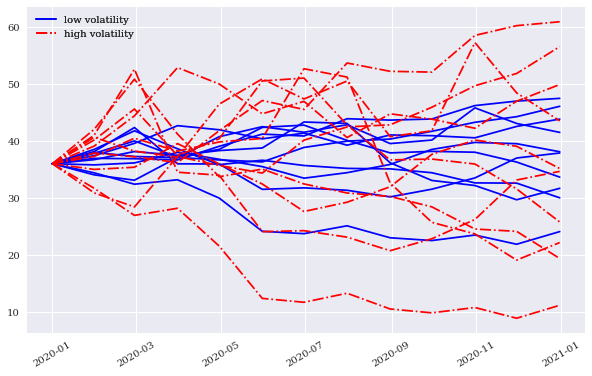

In [46]:
plt.figure(figsize=(10, 6))
p1 = plt.plot(gbm.time_grid, paths_1[:, :10], 'b')
p2 = plt.plot(gbm.time_grid, paths_2[:, :10], 'r-.')
l1 = plt.legend([p1[0], p2[0]],
                ['low volatility', 'high volatility'], loc=2)
plt.gca().add_artist(l1)
plt.xticks(rotation=30);
# plt.savefig('../../images/ch18/dx_sim_01.png');

### Jump Diffusion

In [47]:
me_jd = market_environment('me_jd', dt.datetime(2020, 1, 1))

In [48]:
# specific to simulation class
me_jd.add_constant('lambda', 0.3)  
me_jd.add_constant('mu', -0.75)  
me_jd.add_constant('delta', 0.1)  

In [49]:
me_jd.add_environment(me_gbm)  

In [50]:
from jump_diffusion import jump_diffusion

In [51]:
jd = jump_diffusion('jd', me_jd)

In [52]:
%time paths_3 = jd.get_instrument_values()  

CPU times: user 12.6 ms, sys: 1.75 ms, total: 14.3 ms
Wall time: 12.9 ms


In [53]:
jd.update(lamb=0.9)  

In [54]:
%time paths_4 = jd.get_instrument_values()  

CPU times: user 11.9 ms, sys: 1.55 ms, total: 13.4 ms
Wall time: 11.9 ms


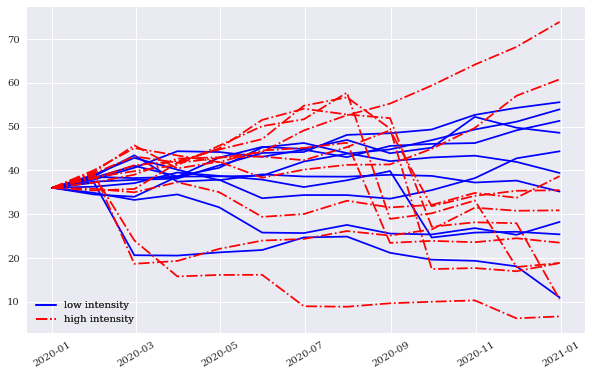

In [55]:
plt.figure(figsize=(10, 6))
p1 = plt.plot(gbm.time_grid, paths_3[:, :10], 'b')
p2 = plt.plot(gbm.time_grid, paths_4[:, :10], 'r-.')
l1 = plt.legend([p1[0], p2[0]],
                ['low intensity', 'high intensity'], loc=3)
plt.gca().add_artist(l1)
plt.xticks(rotation=30);
# plt.savefig('../../images/ch18/dx_sim_02.png');

### Square-Root Diffusion

In [56]:
me_srd = market_environment('me_srd', dt.datetime(2020, 1, 1))

In [57]:
me_srd.add_constant('initial_value', .25)
me_srd.add_constant('volatility', 0.05)
me_srd.add_constant('final_date', dt.datetime(2020, 12, 31))
me_srd.add_constant('currency', 'EUR')
me_srd.add_constant('frequency', 'W')
me_srd.add_constant('paths', 10000)

In [58]:
# specific to simualation class
me_srd.add_constant('kappa', 4.0)
me_srd.add_constant('theta', 0.2)

In [59]:
me_srd.add_curve('discount_curve', constant_short_rate('r', 0.0))  

In [60]:
from square_root_diffusion import square_root_diffusion

In [61]:
srd = square_root_diffusion('srd', me_srd)  

In [62]:
srd_paths = srd.get_instrument_values()[:, :10]  

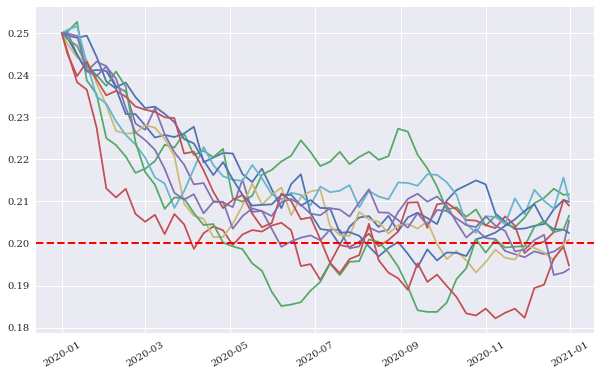

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(srd.time_grid, srd.get_instrument_values()[:, :10])
plt.axhline(me_srd.get_constant('theta'), color='r',
            ls='--', lw=2.0)
plt.xticks(rotation=30);
# plt.savefig('../../images/ch18/dx_sim_03.png');

## Valuation Classes

### European Options

In [64]:
me_gbm = market_environment('me_gbm', dt.datetime(2020, 1, 1))

In [65]:
me_gbm.add_constant('initial_value', 36.)
me_gbm.add_constant('volatility', 0.2)
me_gbm.add_constant('final_date', dt.datetime(2020, 12, 31))
me_gbm.add_constant('currency', 'EUR')
me_gbm.add_constant('frequency', 'M')
me_gbm.add_constant('paths', 10000)

In [66]:
csr = constant_short_rate('csr', 0.06)

In [67]:
me_gbm.add_curve('discount_curve', csr)

In [68]:
gbm = geometric_brownian_motion('gbm', me_gbm)

In [69]:
me_call = market_environment('me_call', me_gbm.pricing_date)

In [70]:
me_call.add_constant('strike', 40.)
me_call.add_constant('maturity', dt.datetime(2020, 12, 31))
me_call.add_constant('currency', 'EUR')

In [71]:
payoff_func = 'np.maximum(maturity_value - strike, 0)'

In [72]:
from valuation_mcs_european import valuation_mcs_european

In [73]:
eur_call = valuation_mcs_european('eur_call', underlying=gbm,
                        mar_env=me_call, payoff_func=payoff_func)

In [74]:
%time eur_call.present_value()  

CPU times: user 6.12 ms, sys: 2.25 ms, total: 8.37 ms
Wall time: 6.87 ms


2.27958

In [75]:
%time eur_call.delta()  

CPU times: user 5.67 ms, sys: 1.55 ms, total: 7.22 ms
Wall time: 5.99 ms


0.5474

In [76]:
%time eur_call.vega()  

CPU times: user 9.81 ms, sys: 1.37 ms, total: 11.2 ms
Wall time: 9.62 ms


15.1853

In [77]:
%%time
s_list = np.arange(34., 46.1, 2.)
p_list = []; d_list = []; v_list = []
for s in s_list:
    eur_call.update(initial_value=s)
    p_list.append(eur_call.present_value(fixed_seed=True))
    d_list.append(eur_call.delta())
    v_list.append(eur_call.vega())

CPU times: user 127 ms, sys: 2.2 ms, total: 129 ms
Wall time: 128 ms


In [78]:
from plot_option_stats import plot_option_stats

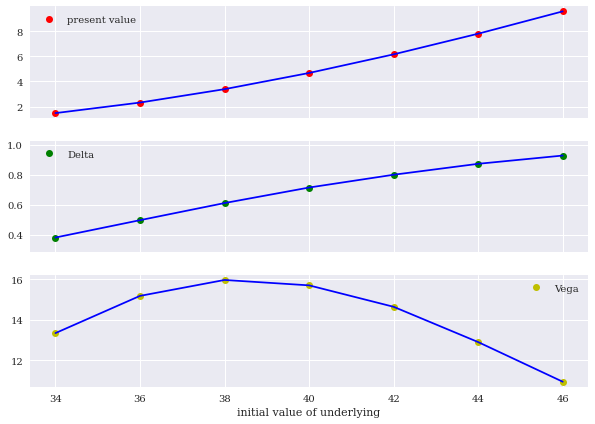

In [79]:
plot_option_stats(s_list, p_list, d_list, v_list)
# plt.savefig('../../images/ch19/dx_val_01.png');

In [80]:
payoff_func = 'np.maximum(0.33 * (maturity_value + max_value) - 40, 0)'  

In [81]:
eur_as_call = valuation_mcs_european('eur_as_call', underlying=gbm,
                            mar_env=me_call, payoff_func=payoff_func)

In [82]:
%%time
s_list = np.arange(34., 46.1, 2.)
p_list = []; d_list = []; v_list = []
for s in s_list:
    eur_as_call.update(s)
    p_list.append(eur_as_call.present_value(fixed_seed=True))
    d_list.append(eur_as_call.delta())
    v_list.append(eur_as_call.vega())

CPU times: user 130 ms, sys: 3.61 ms, total: 133 ms
Wall time: 132 ms


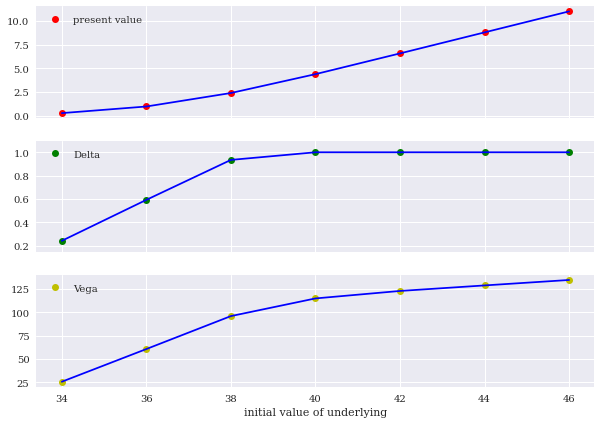

In [83]:
plot_option_stats(s_list, p_list, d_list, v_list)
# plt.savefig('../../images/ch19/dx_val_02.png');

### American Options

In [84]:
me_gbm = market_environment('me_gbm', dt.datetime(2020, 1, 1))

In [85]:
me_gbm.add_constant('initial_value', 36.)
me_gbm.add_constant('volatility', 0.2)
me_gbm.add_constant('final_date', dt.datetime(2021, 12, 31))
me_gbm.add_constant('currency', 'EUR')
me_gbm.add_constant('frequency', 'W')
me_gbm.add_constant('paths', 50000)

In [86]:
csr = constant_short_rate('csr', 0.06)

In [87]:
me_gbm.add_curve('discount_curve', csr)

In [88]:
gbm = geometric_brownian_motion('gbm', me_gbm)

In [89]:
payoff_func = 'np.maximum(strike - instrument_values, 0)'

In [90]:
me_am_put = market_environment('me_am_put', dt.datetime(2020, 1, 1))

In [91]:
me_am_put.add_constant('maturity', dt.datetime(2020, 12, 31))
me_am_put.add_constant('strike', 40.)
me_am_put.add_constant('currency', 'EUR')

In [92]:
from valuation_mcs_american import valuation_mcs_american

In [93]:
am_put = valuation_mcs_american('am_put', underlying=gbm,
                    mar_env=me_am_put, payoff_func=payoff_func)

In [94]:
%time am_put.present_value(fixed_seed=True, bf=5)

CPU times: user 3.03 s, sys: 471 ms, total: 3.5 s
Wall time: 782 ms


4.646023

In [95]:
%%time
ls_table = []
for initial_value in (36., 38., 40., 42., 44.): 
    for volatility in (0.2, 0.4):
        for maturity in (dt.datetime(2020, 12, 31),
                         dt.datetime(2021, 12, 31)):
            am_put.update(initial_value=initial_value,
                          volatility=volatility,
                          maturity=maturity)
            ls_table.append([initial_value,
                             volatility,
                             maturity,
                             am_put.present_value(bf=5)])

CPU times: user 2min 2s, sys: 15.4 s, total: 2min 18s
Wall time: 22 s


In [96]:
print('S0  | Vola | T | Value')
print(22 * '-')
for r in ls_table:
    print('%d  | %3.1f  | %d | %5.3f' % 
          (r[0], r[1], r[2].year - 2019, r[3]))

S0  | Vola | T | Value
----------------------
36  | 0.2  | 1 | 4.624
36  | 0.2  | 2 | 5.160
36  | 0.4  | 1 | 7.500
36  | 0.4  | 2 | 9.594
38  | 0.2  | 1 | 3.382
38  | 0.2  | 2 | 4.057
38  | 0.4  | 1 | 6.515
38  | 0.4  | 2 | 8.651
40  | 0.2  | 1 | 2.431
40  | 0.2  | 2 | 3.150
40  | 0.4  | 1 | 5.639
40  | 0.4  | 2 | 7.814
42  | 0.2  | 1 | 1.679
42  | 0.2  | 2 | 2.401
42  | 0.4  | 1 | 4.831
42  | 0.4  | 2 | 7.051
44  | 0.2  | 1 | 1.147
44  | 0.2  | 2 | 1.873
44  | 0.4  | 1 | 4.177
44  | 0.4  | 2 | 6.427


In [97]:
am_put.update(initial_value=36.)
am_put.delta()

-0.4609

In [98]:
am_put.vega()

23.3117

## Portfolios

### Position

In [99]:
from dx_valuation import *

In [100]:
me_gbm = market_environment('me_gbm', dt.datetime(2020, 1, 1))  

In [101]:
me_gbm.add_constant('initial_value', 36.)  
me_gbm.add_constant('volatility', 0.2)  
me_gbm.add_constant('currency', 'EUR')  

In [102]:
me_gbm.add_constant('model', 'gbm')  

In [103]:
from derivatives_position import derivatives_position

In [104]:
me_am_put = market_environment('me_am_put', dt.datetime(2020, 1, 1))  

In [105]:
me_am_put.add_constant('maturity', dt.datetime(2020, 12, 31))  
me_am_put.add_constant('strike', 40.)  
me_am_put.add_constant('currency', 'EUR')   

In [106]:
payoff_func = 'np.maximum(strike - instrument_values, 0)'  

In [107]:
am_put_pos = derivatives_position(
             name='am_put_pos',
             quantity=3,
             underlying='gbm',
             mar_env=me_am_put,
             otype='American',
             payoff_func=payoff_func)  

In [108]:
am_put_pos.get_info()

NAME
am_put_pos 

QUANTITY
3 

UNDERLYING
gbm 

MARKET ENVIRONMENT

**Constants**
maturity 2020-12-31 00:00:00
strike 40.0
currency EUR

**Lists**

**Curves**

OPTION TYPE
American 

PAYOFF FUNCTION
np.maximum(strike - instrument_values, 0)


### Portfolio

In [109]:
me_jd = market_environment('me_jd', me_gbm.pricing_date)

In [110]:
# add jump diffusion specific parameters
me_jd.add_constant('lambda', 0.3)
me_jd.add_constant('mu', -0.75)
me_jd.add_constant('delta', 0.1)
# add other parameters from gbm
me_jd.add_environment(me_gbm)

In [111]:
# needed for portfolio valuation
me_jd.add_constant('model', 'jd')

In [112]:
me_eur_call = market_environment('me_eur_call', me_jd.pricing_date)

In [113]:
me_eur_call.add_constant('maturity', dt.datetime(2020, 6, 30))
me_eur_call.add_constant('strike', 38.)
me_eur_call.add_constant('currency', 'EUR')

In [114]:
payoff_func = 'np.maximum(maturity_value - strike, 0)'

In [115]:
eur_call_pos = derivatives_position(
             name='eur_call_pos',
             quantity=5,
             underlying='jd',
             mar_env=me_eur_call,
             otype='European',
             payoff_func=payoff_func)

In [116]:
underlyings = {'gbm': me_gbm, 'jd' : me_jd}  
positions = {'am_put_pos' : am_put_pos,
             'eur_call_pos' : eur_call_pos}  

In [117]:
csr = constant_short_rate('csr', 0.06)  

In [118]:
val_env = market_environment('general', me_gbm.pricing_date)
val_env.add_constant('frequency', 'W')
val_env.add_constant('paths', 25000)
val_env.add_constant('starting_date', val_env.pricing_date)
val_env.add_constant('final_date', val_env.pricing_date)  
val_env.add_curve('discount_curve', csr)  

In [119]:
from derivatives_portfolio import derivatives_portfolio

In [120]:
portfolio = derivatives_portfolio(
                name='portfolio',
                positions=positions,
                val_env=val_env,
                assets=underlyings,
                fixed_seed=False)  

In [121]:
%time portfolio.get_statistics(fixed_seed=False)

CPU times: user 13 s, sys: 1.38 s, total: 14.3 s
Wall time: 2.54 s


,name,quant.,value,curr.,pos_value,pos_delta,pos_vega
0,am_put_pos,3,4.621029,EUR,13.863087,-1.9383,42.3357
1,eur_call_pos,5,2.914060,EUR,14.570300,3.3510,43.5420


In [122]:
portfolio.get_statistics(fixed_seed=False)[
    ['pos_value', 'pos_delta', 'pos_vega']].sum()  

pos_value    28.483829
pos_delta     1.342500
pos_vega     85.877700
dtype: float64

In [123]:
# portfolio.get_positions()  

In [124]:
portfolio.valuation_objects['am_put_pos'].present_value()  

4.637843

In [125]:
portfolio.valuation_objects['eur_call_pos'].delta()  

0.6711

In [126]:
path_no = 888
path_gbm = portfolio.underlying_objects[
    'gbm'].get_instrument_values()[:, path_no]
path_jd = portfolio.underlying_objects[
    'jd'].get_instrument_values()[:, path_no]

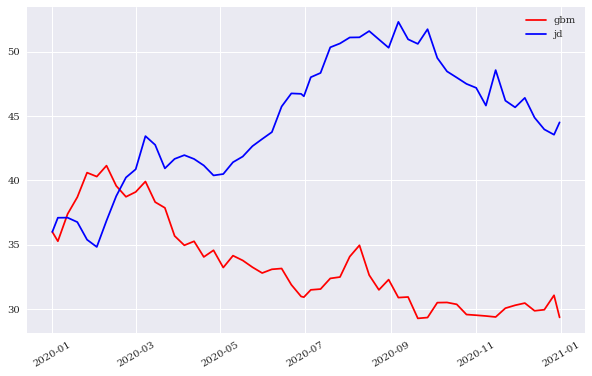

In [127]:
plt.figure(figsize=(10,6))
plt.plot(portfolio.time_grid, path_gbm, 'r', label='gbm')
plt.plot(portfolio.time_grid, path_jd, 'b', label='jd')
plt.xticks(rotation=30)
plt.legend(loc=0)
# plt.savefig('../../images/ch20/dx_port_01.png');

In [128]:
correlations = [['gbm', 'jd', 0.9]]

In [129]:
port_corr = derivatives_portfolio(
                name='portfolio',
                positions=positions,
                val_env=val_env,
                assets=underlyings,
                correlations=correlations,
                fixed_seed=True)

In [130]:
port_corr.get_statistics()

,name,quant.,value,curr.,pos_value,pos_delta,pos_vega
0,am_put_pos,3,4.620772,EUR,13.862316,-1.9359,42.7728
1,eur_call_pos,5,2.902912,EUR,14.514560,3.4380,43.5095


In [131]:
path_gbm = port_corr.underlying_objects['gbm'].\
            get_instrument_values()[:, path_no]
path_jd = port_corr.underlying_objects['jd'].\
            get_instrument_values()[:, path_no]

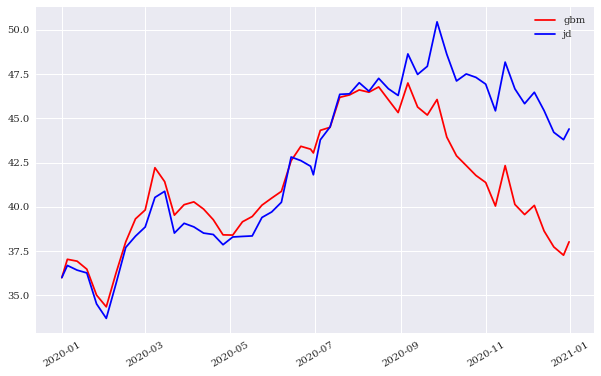

In [132]:
plt.figure(figsize=(10, 6))
plt.plot(portfolio.time_grid, path_gbm, 'r', label='gbm')
plt.plot(portfolio.time_grid, path_jd, 'b', label='jd')
plt.xticks(rotation=30)
plt.legend(loc=0);
# plt.savefig('../../images/ch20/dx_port_02.png');

In [133]:
pv1 = 5 * port_corr.valuation_objects['eur_call_pos'].\
            present_value(full=True)[1]
pv1

array([ 0.        , 40.91362618, 25.65941221, ...,  0.        ,
        6.62026499,  8.40476973])

In [134]:
pv2 = 3 * port_corr.valuation_objects['am_put_pos'].\
            present_value(full=True)[1]
pv2

array([21.59315856, 11.9322554 , 19.97013408, ..., 21.71891723,
       12.80948124,  0.        ])

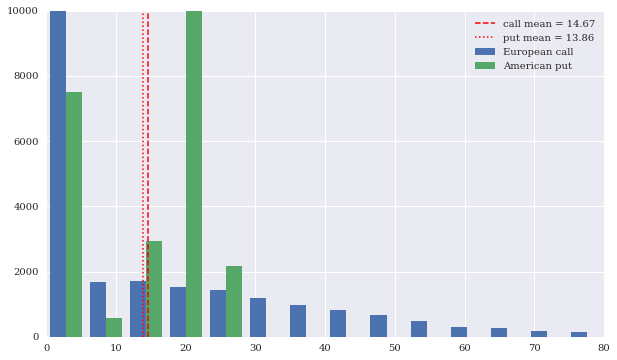

In [135]:
plt.figure(figsize=(10, 6))
plt.hist([pv1, pv2], bins=25,
         label=['European call', 'American put']);
plt.axvline(pv1.mean(), color='r', ls='dashed',
            lw=1.5, label='call mean = %4.2f' % pv1.mean())
plt.axvline(pv2.mean(), color='r', ls='dotted',
            lw=1.5, label='put mean = %4.2f' % pv2.mean())
plt.xlim(0, 80); plt.ylim(0, 10000)
plt.legend();
# plt.savefig('../../images/ch20/dx_port_03.png');

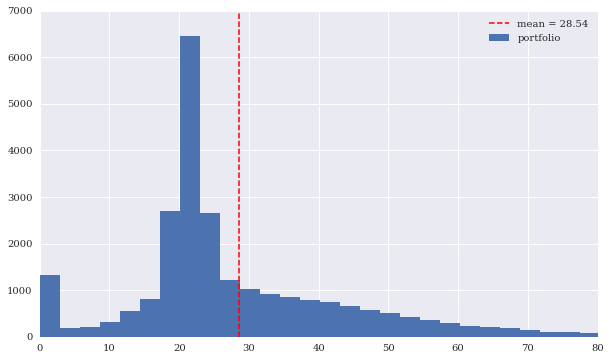

In [136]:
pvs = pv1 + pv2
plt.figure(figsize=(10, 6))
plt.hist(pvs, bins=50, label='portfolio');
plt.axvline(pvs.mean(), color='r', ls='dashed',
            lw=1.5, label='mean = %4.2f' % pvs.mean())
plt.xlim(0, 80); plt.ylim(0, 7000)
plt.legend();
# plt.savefig('../../images/ch20/dx_port_04.png');

In [137]:
pvs.std()  

16.944071027037896

In [138]:
pv1 = (5 * portfolio.valuation_objects['eur_call_pos'].
            present_value(full=True)[1])
pv2 = (3 * portfolio.valuation_objects['am_put_pos'].
            present_value(full=True)[1])
(pv1 + pv2).std()  

23.08385800417789

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>